# Анализ оттока клиентов банка "Метанпром"

## Вступление

Данное исследование посвящено анализу оттока клиентов банка "Метанпром" и заказано его отделом маркетинга. Главная цель - выявить высокоотточные сегменты клиентов ради оптимизации дальнейших маркетинговых кампаний банка для менеджера, который работает в тесной связке с менеджерами продуктов. Искомые сегменты также должны быть однородными и покрывать максимальное количество проблемных зон банка. Их выявление должно в конечном счёте привести к уменьшению оттока пользователей, который в последнее время заметно вырос и превратился в проблему, угрожающую существованию банка. 

Ранее уже проводилось подобное исследование, по результатам которого был составлен дашборд, но с тех пор состав клиентов банка изменился, дашборд устарел, а полученные сегменты больше не подходят для решения возникшей проблемы. Прошлое исследование никак не будет отображено в рамках нынешнего.

Для анализа будет использоваться предоставленный банком актуальный датасет с информацией о клиентах «Метанпром». 

Исследование построено следующим образом:

* Глава 2 посвящена подготовке к анализу: загрузке необходимых библиотек, датафрейма, проведению первичного анализа и обработке  данных, включая выявление явных и неявных дубликатов, исследование пропущенных значений и принятие решения об их обработке, исследование соответствия типов (и приведение данных к нужному типу при необходимости), проверка корректности наименований колонок (и их переименование в случае необходимости);   
* В главе 3 будет проведён исследовательский анализ данных: 
    * В главе 3.1 будут по отдельности построены портреты типичных клиентов, которые склонны и не склонны уходить из банка. Признаки клиентов будут взяты из датасета;
    * В главе 3.2 будут определены интервалы значений характеристик, которые связаны с повышенным оттоком, по каждому имеющемуся признаку, путём отрисовки и анализа соответствующих гистограмм. Это позволит обнаружить первые признаки клиентов, которые склонны уходить из банка;
    * Далее, в главе 3.3 будет произведена сегментация клиентов на основании результатов, полученных в главе 3.2, путём составления различных комбинаций признаков клиентов, склонных уходить из банка. Цель - обнаружить высокоотточные сегменты, включающие в себя от 500 до 2000 пользователей - именно такие сегменты считаются оптимальными для целей банка. Целевой показатель оттока внутри сегмента - от 30 до 80%;
    * В главе 3.5 будут подведены итоги исследовательского анализа и даны рекомендации. 
* Глава 4 посвящена проверке двух статистических гипотез. Проверка обеих гипотез будет построена по одному сценарию: формирование нулевой и альтернативной гипотезы, определение уровня статистической значимости (alpha), нахождение p-value и его сравнение с уровнем статистической значимости. В конце каждой проверки будет дано заключение: отвергнута нулевая гипотеза в пользу альтернативной или нет;
* Наконец, в главе 5 будут подведены итоги исследования.

## Подготовка к анализу

Загрузка библиотек и файла с данными (название файла с данными - clients):

In [1]:
!pip install phik 
!pip install -U scikit-learn
import phik
from phik.report import plot_correlation_matrix
from phik import report
!pip install matplotlib==3.3.4
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import itertools
from itertools import combinations
from functools import reduce

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
clients = pd.read_csv('/datasets/bank_scrooge.csv')

Создание универсальной функции для анализа датасетов:

In [3]:
def first_analysis(data):
    print(data.shape)
    data.info()
    display(data.describe())
    display(data.head())
    print(data.duplicated().sum())

In [4]:
first_analysis(clients)

(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


0


Датасет включает в себя 10 000 строк и 12 колонок. Явных дубликатов нет. Названия некоторых столбцов необходимо привести к стандартам "змеиного_стиля".

In [5]:
clients.columns = clients.columns.str.lower()
clients.rename(columns = {'userid':'user_id'}, inplace=True) 
clients.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Столбцы успешно переименованы.

Датасет содержит данные о 10 000 клиентах банка «Метанпром» и содержит следующие колонки:
* user_id — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город (всего их 3: Ярославль, Ростов Великий и Рыбинск),
* gender — пол,
* age — возраст,
* equity — количество баллов собственности (высчитывается банком),
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — наличие (или отсутствие) кредитной карты (1 - карта есть, 0 - нет),
* last_activity — является ли клиент активным (1 - является, 0 - нет),
* est_salary — оценочный доход клиента (высчитывается банком),
* сhurn — признак оттока (1 - клиент ушёл, 0 - остался).

Явных дубликатов в датасете нет, но могут оставаться неявные. Следует изучить, есть ли дубликаты в колонке user_id.

In [6]:
clients['user_id'].duplicated().sum()

73

Таких значений целых 73. Неясно, по какому принципу присваивался идентификационный номер клиента, не исключена возможность, что одинаковые номера были выданы разным людям (например, в разных отделениях банка).

Будет организована дополнительная проверка по ключевым параметрам клиента, а именно его идентификационному номеру, полу и возрасту, т.е. столбцам user_id, gender и age. Вероятность, что у разных клиентов совпадут сразу три параметра, крайне низка.

In [7]:
clients= clients.drop_duplicates(subset=['user_id','gender', 'age'],
                                 keep='first')
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9998 non-null   int64  
 1   score          9998 non-null   float64
 2   city           9998 non-null   object 
 3   gender         9998 non-null   object 
 4   age            9972 non-null   float64
 5   equity         9998 non-null   int64  
 6   balance        7704 non-null   float64
 7   products       9998 non-null   int64  
 8   credit_card    9998 non-null   int64  
 9   last_activity  9998 non-null   int64  
 10  est_salary     9998 non-null   float64
 11  churn          9998 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.4+ KB


Из датасета были удалены 2 клиента, которые явно были неявными дубликатами.

Следующий шаг - проверка уникальных значений отдельных столбцов с целью выявления явных аномалий и возможных опечаток:

In [8]:
unique_clients = clients[['score', 'city', 'gender', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'churn']]
for col in clients.columns:
    if col in unique_clients:
        print(clients[col].unique())

[ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754.  756.  823.  658.  734.  954.  827.  929.
  760.  688.  659.  817.  718.  705.  920.  652.  649.  862.  770.  824.
  934.  952.  977.  840.  709.  878.  808.  900.  7

Результат:
* Кредитный рейтинг не может превышать 1000 баллов, аномальных значений нет;
* Названий городов всего три, как и должно быть;
* Пола всего два - "М" и "Ж";
* Клиенты возрастом младше 14 лет не могут являться клиентами банка по закону, в датафрейме таких значений нет. Верхняя планка возраста также в разумных пределах - 84 года;
* Показатель equity также в норме;
* Количество продуктов, которыми пользуется клиент, от 0 до 5, что тоже является нормальным;
* Булевы столбцы в норме.

Единственное вносимое изменение - в столбец gender для удобства обработки данных значений вместо "М" и "Ж" будут стоять 1 и 0 соответственно.

Следующий шаг - смена типов данных. У столбца score можно сменить тип данных на int:

In [9]:
clients['gender'] = clients['gender'].replace({'Ж': 0, 'М': 1})
clients['score'] = clients['score'].astype('int')
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9998 non-null   int64  
 1   score          9998 non-null   int64  
 2   city           9998 non-null   object 
 3   gender         9998 non-null   int64  
 4   age            9972 non-null   float64
 5   equity         9998 non-null   int64  
 6   balance        7704 non-null   float64
 7   products       9998 non-null   int64  
 8   credit_card    9998 non-null   int64  
 9   last_activity  9998 non-null   int64  
 10  est_salary     9998 non-null   float64
 11  churn          9998 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1015.4+ KB


Последний шаг - обработка пропусков. В датафрейме есть 2 столбца с пропусками: age и balance. 
Строки с пропусками в колонке age составляют всего 0.26% от всего датафрейма и могут быть удалены.

Пропусков в balance слишком много, чтобы удалять почти четверть датафрейма. Суммы остатков по счетам неизвестны. Эти пропуски будут оставлены как есть.

Подсчёт доли пропусоков в датафрейме. Колонка "возраст":

In [10]:
share_age_nan = 26/10000*100
share_age_nan 

0.26

И "баланс":

In [11]:
share_balance_nan = 2294/10000*100
share_balance_nan 

22.939999999999998

Удаление строк с пропусками в колонке "возраст":

In [12]:
clients.dropna(subset = ['age'], inplace = True)
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9972 non-null   int64  
 1   score          9972 non-null   int64  
 2   city           9972 non-null   object 
 3   gender         9972 non-null   int64  
 4   age            9972 non-null   float64
 5   equity         9972 non-null   int64  
 6   balance        7694 non-null   float64
 7   products       9972 non-null   int64  
 8   credit_card    9972 non-null   int64  
 9   last_activity  9972 non-null   int64  
 10  est_salary     9972 non-null   float64
 11  churn          9972 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1012.8+ KB


Предобработка данных завершена, датасет подготовлен к анализу данных.

## Исследовательский анализ данных

Исследовательский анализ данных будет построен следующим образом:
* Сначала будут проанализированы показатели оставшихся и ушедших клиентов по отдельности - составлены их "портреты".
* Далее будут сформированы высокоотточные сегменты по следующему алгоритму:
    * Определение высокоотточных интервалов в рамках каждого признака по отдельности;
    * Создание всех возможных комбинаций (сегментов), состоящих из 2 признаков, с последующим анализом уровня оттока и количества клиентов в каждом сегменте;
    * Для более глубокого анализа также будут созданы все возможные комбинации, состоящие из 3 признаков, с аналогичной последующей интерпретацией;
    * Конечная цель - получить минимум 5 сегментов, соответствующих требованиям заказчика.

Для начала будет сделан общий анализ датасета после обработки данных:

In [13]:
clients.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9972.00,9972.00,9972.00,9972.00,9972.00,7694.00,9972.00,9972.00,9972.00,9972.00,9972.00
mean,171751.20,848.68,0.50,42.74,2.63,827310.66,1.87,0.68,0.52,147794.03,0.18
std,33693.85,65.40,0.50,12.18,1.98,1980447.89,0.79,0.47,0.50,139298.50,0.39
min,94561.00,642.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142750.50,802.00,0.00,33.00,0.00,295633.95,1.00,0.00,0.00,75240.71,0.00
50%,172643.00,853.00,1.00,40.00,3.00,524356.49,2.00,1.00,1.00,119626.79,0.00
75%,201163.25,900.00,1.00,51.00,4.00,980378.53,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,1.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Краткий анализ по всему датасету:
* Отрицательных значений нет;
* Средний кредитный рейтинг клиентов банка - 849, медиана - 853. Минимальное значение 642, максимальное - 1000 (из 1000 возможных);
* Половина клиентов - мужчины;
* Минимальный возраст клиентов - 18 лет, максимальный - 86. Средний возраст - 43 года, 50% клиентов не старше 40;
* Среднее количество баллов собственности, набранное клиентами - 2.6, медиана - 3.0. 75% набрали не более 4 баллов, максимальное значение - 9;
* Средний остаток на счёте составил 827 311 рублей, медиана - 524 356,5 рублей;
* 75% клиентов пользуется не более 2 продуктами банка, среднее значение - 1,9.
* 68% клиентов имеют кредитную карту;
* 52% клиентов активны;
* Наконец, в среднем отток по датасету составляет 18%. 

Важный этап анализа - создание матрицы корреляции. При наличии категориальных значений в датафрейме (колонка city) рекомендуется использовать коэффициент корреляции Фи. У этого коэффициента есть два преимущества:
* Он считается более адаптированным к учёту нелинейных зависимостей.
* Его можно использовать в том числе для категориальных признаков.

Создание матрицы корреляции:

In [14]:
clients_no_id = clients.drop("user_id", axis='columns')
clients_no_id 

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,0,25.00,1,59214.82,2,0,1,75719.14,1
1,861,Рыбинск,0,37.00,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,0,30.00,0,NaN,1,1,1,107683.34,0
3,866,Ярославль,0,51.00,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,1,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,814,Рыбинск,1,27.00,1,78144.65,1,0,1,18943.64,0
9996,894,Ярославль,1,46.00,0,NaN,1,1,0,196898.29,0
9997,903,Ярославль,1,24.00,0,NaN,2,1,1,108905.09,0
9998,777,Ярославль,0,68.00,3,865457.97,3,0,1,86874.90,0


In [15]:
phik_corr = clients_no_id.phik_matrix(interval_cols = ['score',
                                                       'gender',
                                                       'age',
                                                       'equity',
                                                       'balance',
                                                       'products', 
                                                       'credit_card',
                                                       'last_activity',
                                                       'est_salary', 
                                                       'churn'])

phik_corr = phik_corr.round(2)
phik_corr = phik_corr.sort_values(by = 'churn', ascending = False)
phik_corr

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
churn,0.23,0.02,0.22,0.19,0.35,0.02,0.44,0.20,0.26,0.05,1.00
products,0.31,0.22,0.12,0.13,0.44,0.00,1.00,0.46,0.19,0.16,0.44
equity,0.53,0.06,0.06,0.05,1.00,0.00,0.44,0.22,0.05,0.29,0.35
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.19,0.05,1.00,0.04,0.26
score,1.00,0.09,0.07,0.03,0.53,0.17,0.31,0.21,0.05,0.39,0.23
gender,0.07,0.01,1.00,0.29,0.06,0.05,0.12,0.20,0.01,0.14,0.22
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.46,1.00,0.05,0.04,0.20
age,0.03,0.09,0.29,1.00,0.05,0.02,0.13,0.16,0.09,0.36,0.19
est_salary,0.39,0.17,0.14,0.36,0.29,0.37,0.16,0.04,0.04,1.00,0.05
city,0.09,1.00,0.01,0.09,0.06,0.04,0.22,0.07,0.03,0.17,0.02


Визуализация таблицы значений - как отдельно столбца churn, так и всей целиком.

Сначала будет изучена корреляция коэффициента оттока с остальными признаками. График отсортирован по значениям. 

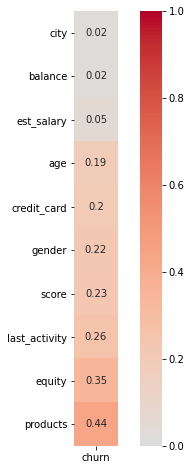

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(phik_corr.loc[:, ['churn']].drop('churn').sort_values('churn'), annot = True, 
            square = True, vmin=0, vmax=1, cmap = 'coolwarm', center = 0);          
plt.show()    

Результаты следующие:
* Больше всего влияние на решение уйти оказывают количество продуктов банка, которым пользуется клиент - коэффициент корреляции составляет 0,44. На втором месте количество баллов собственности - коэффициент составляет 0,35. Замыкает тройку лидеров активность клиента - 0,26. На четвёртом месте кредитный рейтинг - 0,23, а на пятом пол - 0,22. 
* Куда слабее на решение уйти влияют факт наличия кредитной карты (коэффициент составляет 0,2) и возраст (0,19).
* Почти никак не влияют на отток оценочный доход клиента (всего лишь 0,05), город и остаток на счёте (коэффициент у каждого составляет всего лишь 0,02).

Визуализация матрицы корреляции целиком:

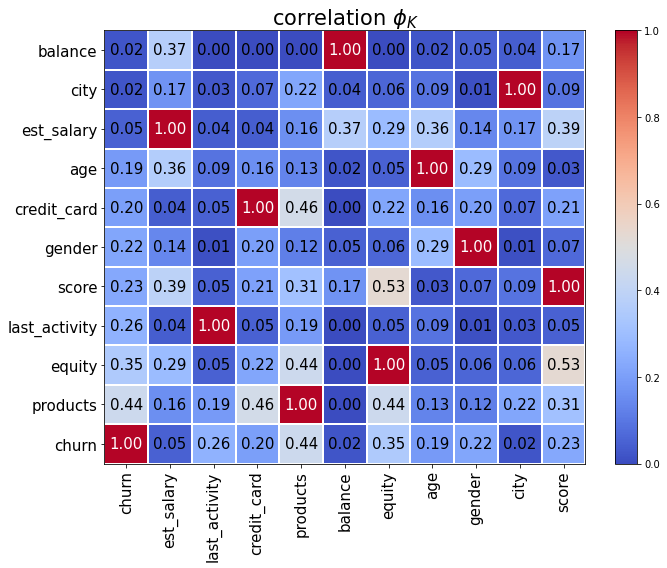

In [17]:
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Важно также взглянуть на значимость коэффициентов. Для наглядности будет построен график.

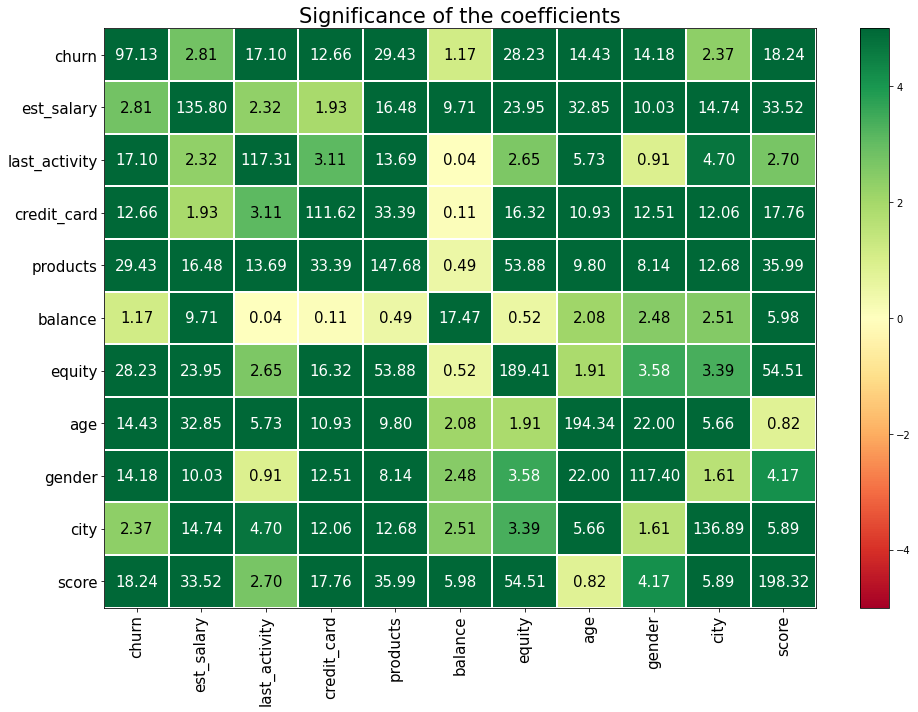

In [18]:
significance_of_corr = clients_no_id.significance_matrix(interval_cols=['score',
                                                                        'gender',
                                                                        'age',
                                                                        'equity',
                                                                        'balance',
                                                                        'products', 
                                                                        'credit_card',
                                                                        'last_activity',
                                                                        'est_salary', 
                                                                        'churn'])
plot_correlation_matrix(significance_of_corr.fillna(0).values, 
                        x_labels=significance_of_corr.columns, 
                        y_labels=significance_of_corr.index, 
                        vmin=-5, vmax=5, title= 'Significance of the coefficients', 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

Результаты получились следующими:

* Самые значимые коэффициенты у количества продуктов банка, которым пользуется клиент, баллов собственности и кредитного рейтинга;
* Далее следуют активность клиента, пол и факт наличия кредитной карты;
* Наименее значимые коэффициенты - у оценочного дохода клиента, города и остатка на счёте. 

Наконец, будет построена глобальная корреляция, т.е. коэффициент корреляции одного признака по отношению ко всем другим признакам в датасете.

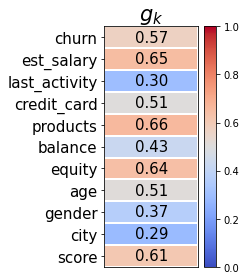

In [19]:
global_corr, global_lab = clients_no_id.global_phik(interval_cols=['score',
                                                                   'gender',
                                                                   'age',
                                                                   'equity',
                                                                   'balance',
                                                                   'products', 
                                                                   'credit_card',
                                                                   'last_activity',
                                                                   'est_salary', 
                                                                   'churn'])
plot_correlation_matrix(global_corr, 
                        x_labels=[''], y_labels=global_lab, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="coolwarm", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

Самый высокий глобальный коэффициент корреляции у количества используемых клиентом продуктов банка - коэффициент составляет аж 0,66. На втором месте оценочный доход клиента (0,65), на третьем - количество баллов собственности (0,64). 

Четвёртое место за кредитным рейтингом - 0,61. Интересующий признак - факт оттока - находится лишь на пятом месте с коэффициентом 0,57
. Коэффициент корреляции всё ещё достаточно высокий.

**Промежуточные итоги**

В целом по имеющему датафрейму можно сделать следующие выводы:

* Связь столбца churn с остальными столбцами датафрейма достаточно сильная, чтобы использовать результаты корреляционной матрицы для поиска высокоотточных сегментов;
* В среднем отток по датасету составляет 18%;
* Больше всего влияние на решение уйти оказывает количество продуктов банка, которым пользуется клиент, количество баллов собственности, активность клиента, кредитный рейтинг, пол и факт наличия кредитной карты. У этих же признаков самые значимые коэффициенты;
* Слабо или почти никак не влияют на отток оценочный доход, город и остаток на счёте. Также у этих признаков коэффициенты наименее значимые.

Настало время изучить клиентов в разных разрезах для нужд данного исследования.

### Портреты клиентов, которые остались, и тех, кто ушёл

В начале исследования будут по отдельности проанализированы характеристики клиентов, которые остались, и которые ушли. При этом идентификационные номера клиентов исследоваться не будут. Будет предпринята попытка найти различия между этими двумя группами.
Сначала будет определён портрет клиентов, которые остались:

#### Портреты клиентов, которые остались

In [20]:
clients_stayed = clients_no_id.query('churn == 0')
first_analysis(clients_stayed)

(8153, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          8153 non-null   int64  
 1   city           8153 non-null   object 
 2   gender         8153 non-null   int64  
 3   age            8153 non-null   float64
 4   equity         8153 non-null   int64  
 5   balance        5888 non-null   float64
 6   products       8153 non-null   int64  
 7   credit_card    8153 non-null   int64  
 8   last_activity  8153 non-null   int64  
 9   est_salary     8153 non-null   float64
 10  churn          8153 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 764.3+ KB


,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,8153.00,8153.00,8153.00,8153.00,5888.00,8153.00,8153.00,8153.00,8153.00,8153.00
mean,845.39,0.47,43.02,2.38,733100.66,1.76,0.71,0.48,147683.44,0.00
std,68.00,0.50,12.38,1.97,1954111.25,0.71,0.45,0.50,142700.74,0.00
min,642.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,796.00,0.00,34.00,0.00,279552.69,1.00,0.00,0.00,73411.81,0.00
50%,848.00,0.00,40.00,3.00,475437.82,2.00,1.00,0.00,118227.60,0.00
75%,900.00,1.00,51.00,4.00,853859.89,2.00,1.00,1.00,173979.08,0.00
max,1000.00,1.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,0.00


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,861,Рыбинск,0,37.00,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,0,30.00,0,NaN,1,1,1,107683.34,0
5,856,Рыбинск,1,56.00,4,863687.24,3,1,0,156619.80,0
6,807,Ярославль,0,39.00,3,405042.44,3,0,1,103838.32,0
7,825,Ярославль,0,38.00,4,458145.40,2,1,1,68085.48,0


0


В датафрейме 8 153 оставшихся клиентов.

Их портрет:
* Может быть как женщиной, так и мужчиной (в выборке 47% являются мужчинами);
* Примерный возраст - 43 года (половина клиентов не старше 40 лет);
* Кредитный рейтинг - 845 баллов (что является чуть ниже, чем в целом среди всех клиентов банка (ушедших и оставшихся) - 849 баллов);
* Количество баллов собственности составляет всего лишь 2.4;
* Баланс на счёте - 733 101 рубль (среднее). Медианное значение группы - 475 438, что говорит о том, что большая часть группы владеет куда более скромным количеством средств. 75% группы имеют на счёте не более 853 860, что подтверждает предположение о том, что в группе есть небольшое количество очень состоятельных клиентов, которые "завышают" показатели "богатства" для большей части группы;
* Количество используемых продуктов банка - 1.8 (среднее арифметическое), или 2 (медиана);	
* Скорее всего, у клиента есть кредитная карта банка (она есть у 71% клиентов);
* При этом клиент является скорее неактивным (активны только 48% клиентов);
* Оценочный доход клиента - 147 683 рублей (среднее арифметическое) или ещё меньше (медиана составляет 118 228).

Этот результат стоит сравнить с профилями клиентов, которые ушли.

#### Портреты клиентов, которые ушли

In [21]:
clients_left = clients_no_id.query('churn == 1')
first_analysis(clients_left)

(1819, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 9994
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          1819 non-null   int64  
 1   city           1819 non-null   object 
 2   gender         1819 non-null   int64  
 3   age            1819 non-null   float64
 4   equity         1819 non-null   int64  
 5   balance        1806 non-null   float64
 6   products       1819 non-null   int64  
 7   credit_card    1819 non-null   int64  
 8   last_activity  1819 non-null   int64  
 9   est_salary     1819 non-null   float64
 10  churn          1819 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 170.5+ KB


,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1819.00,1819.00,1819.00,1819.00,1806.00,1819.00,1819.00,1819.00,1819.00,1819.00
mean,863.42,0.65,41.45,3.76,1134458.21,2.38,0.55,0.70,148289.70,1.00
std,49.62,0.48,11.18,1.59,2034445.55,0.92,0.50,0.46,122932.16,0.00
min,706.00,0.00,18.00,0.00,6.00,0.00,0.00,0.00,10880.27,1.00
25%,828.00,0.00,32.00,3.00,387482.16,2.00,0.00,0.00,83196.61,1.00
50%,866.00,1.00,39.00,4.00,783908.90,2.00,1.00,1.00,125395.22,1.00
75%,898.00,1.00,52.00,5.00,1348127.55,3.00,1.00,1.00,175985.39,1.00
max,1000.00,1.00,79.00,9.00,64866210.15,5.00,1.00,1.00,1263028.49,1.00


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,0,25.00,1,59214.82,2,0,1,75719.14,1
3,866,Ярославль,0,51.00,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,1,34.00,5,174.00,1,1,0,67353.16,1
12,845,Ярославль,0,31.00,3,591928.52,2,1,1,112697.16,1
40,811,Рыбинск,1,34.00,2,129799.35,1,0,0,96242.71,1


0


Всего таких клиентов 1 819 в датасете.
Портрет клиента:
* Скорее мужчина, чем женщина (в выборке 66% являются мужчинами);
* Примерный возраст - 39 - 41,5 лет;
* Кредитный рейтинг - 863, что выше и среднего среди всех клиентов, и выше чем средний кредитный рейтинг среди оставшихся клиентов;
* Количество баллов собственности составляет 3,8, что гораздо больше, чем 2,4 у оставшихся клиентов;
* Баланс на счёте - 1 134 458 рублей (среднее значение), либо 783 909 (медиана). Здесь так же есть группа очень богатых клиентов, которая "завышает" показатели "богатства" всей группы. Однако в любом случае ушедшие клиенты в целом богаче тех, кто остался;
* Количество используемых продуктов банка - 2,4 (среднее арифметическое), или 2 (медиана);	
* Почти с равной вероятностью у клиента как может быть кредитная карта банка, так её может и не быть (ею владеют 55% участников выборки);
* Клиент скорее активен (70% клиентов активны);
* Оценочный доход клиента - 148 290 рублей (среднее арифметическое) или 125 395(медиана), что немного выше аналогичных показателей у оставшихся клиентов.

Наконец, можно сравнить распределение клиентов в обеих группах по городам (графики для наглядности расположены рядом друг с другом):

In [22]:
clients_cities_stayed = clients_stayed.groupby('city')['age'].count().sort_values(ascending = False)
clients_cities_left = clients_left.groupby('city')['age'].count().sort_values(ascending = False)
clients_cities = pd.concat([clients_cities_stayed, clients_cities_stayed], axis=1)
clients_cities.columns = ['clients_stayed', 'clients_left']
clients_cities.head()

,clients_stayed,clients_left
city,,
Ярославль,4757,4757
Рыбинск,2245,2245
Ростов,1151,1151


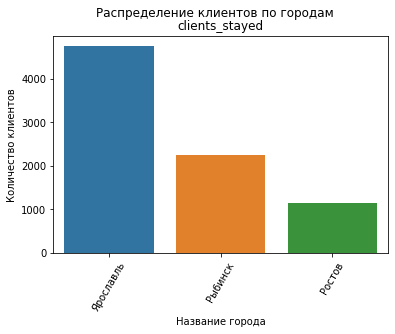

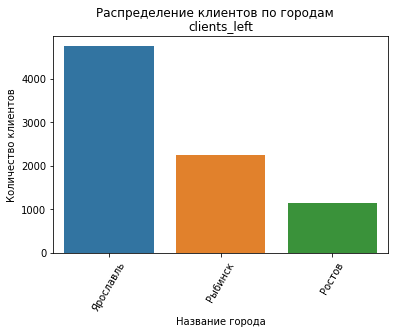

In [23]:
for col in clients_cities.columns:
    sns.barplot(x = clients_cities.index, y = col, data = clients_cities)
    plt.ylabel('Количество клиентов')
    plt.xlabel('Название города')
    plt.xticks(rotation=60)
    plt.title(col)
    plt.suptitle('Распределение клиентов по городам')
    plt.show()

Очевидно, что лидером в обоих случаях является город Ярославль. Сильных различий между графиками не обнаружено.

**Промежуточные выводы:**

Сравнение оставшихся и ушедших клиентов выявило следующие заметные различия:

* Мужчины чаще уходят в отток;
* У уходящих в отток клиентов кредитный рейтинг заметно выше, чем у остающихся;
* Количество баллов собственности у уходящих составляет 3,8, что гораздо больше, чем 2,4 у оставшихся клиентов;
* Ушедшие реже владели кредитной картой банка;
* Уходящие клиенты более "активные".

### Определение высокоотточных интервалов в пределах каждого признака

Для обнаружения высокоотточных сегментов сначала необходимо определить высокоотточные интервалы в пределах каждого признака по отдельности. Как и в случае с портретами клиентов, идентификационные номера не будут являться частью анализа.
Первый шаг - отрисовка и анализ гистограмм по каждому имеющему признаку с делением клиентов на тех, кто остался и тех, кто ушёл в отток. 

In [24]:
columns_num = clients[['score', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card',
                       'last_activity', 'est_salary']]

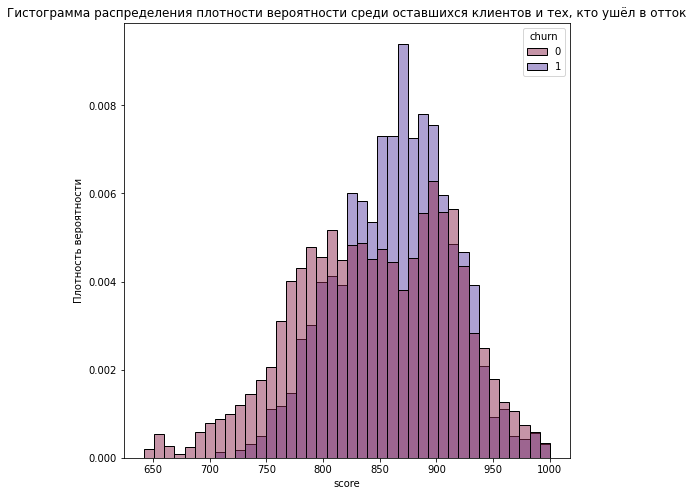

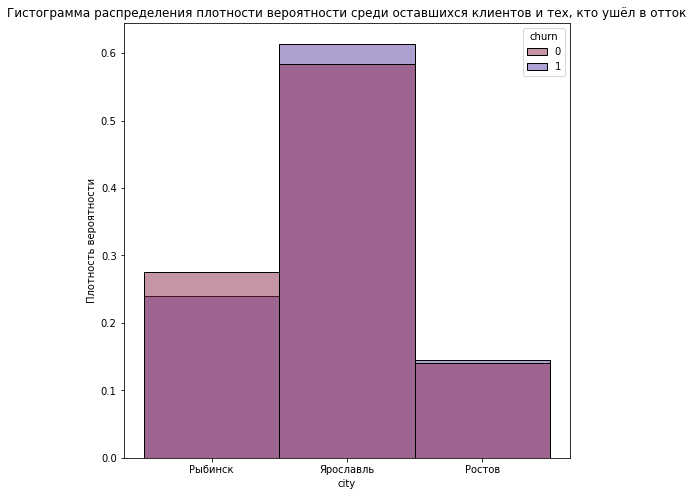

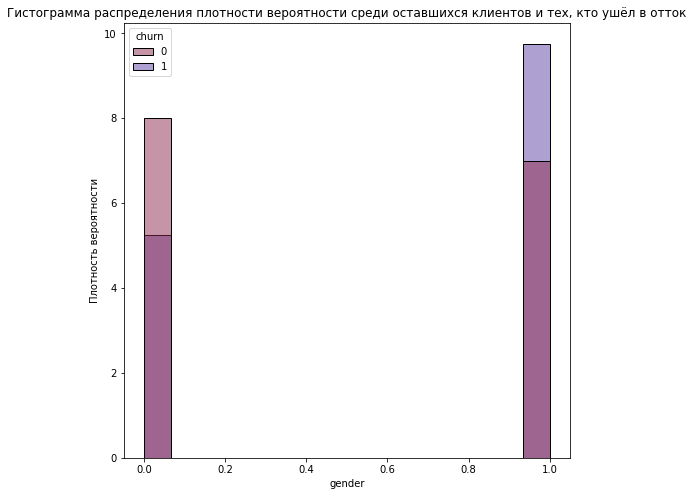

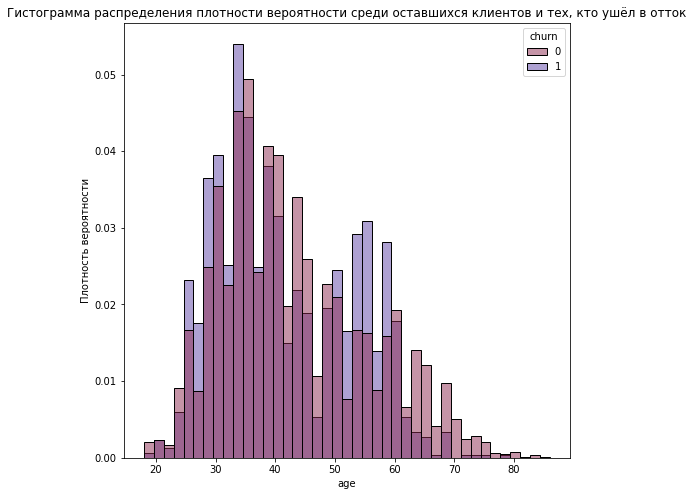

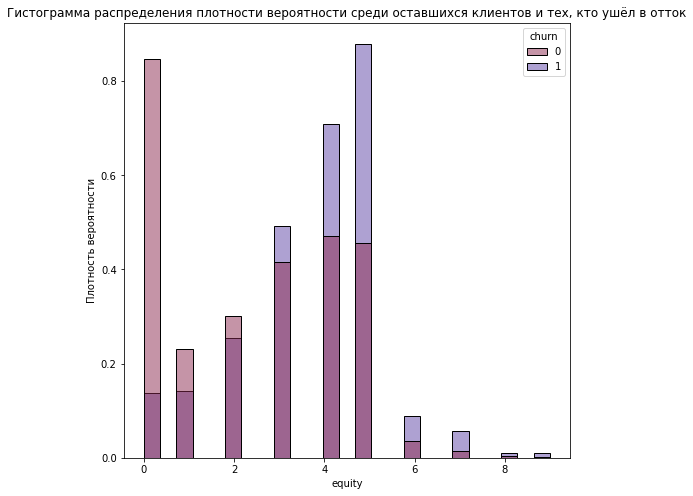

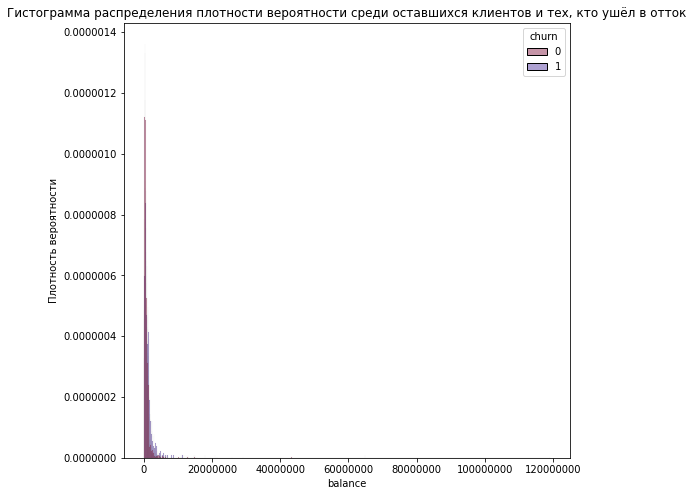

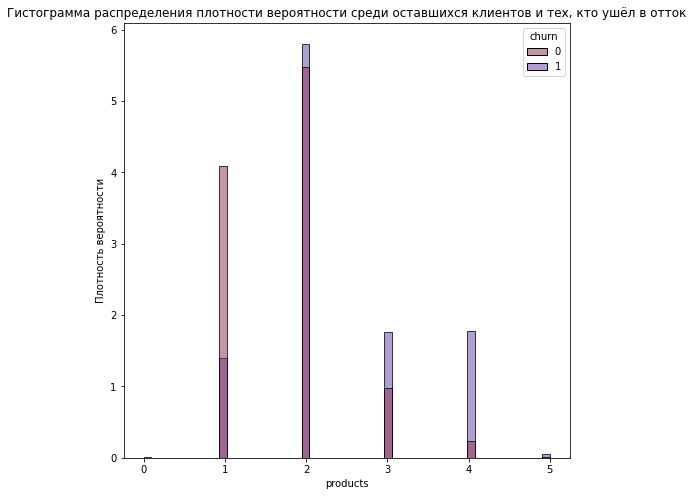

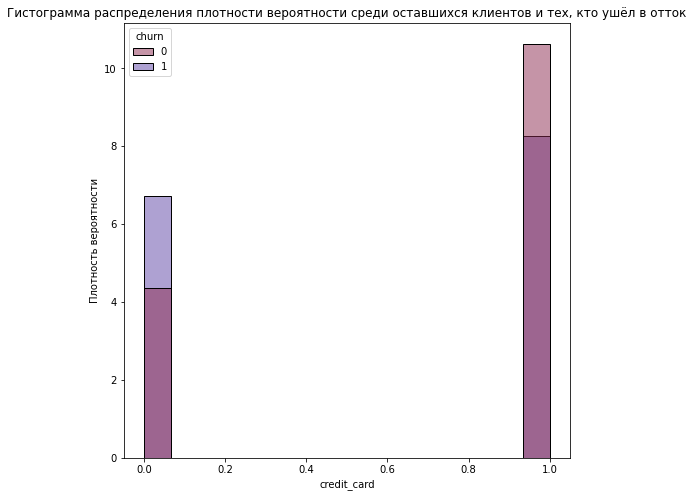

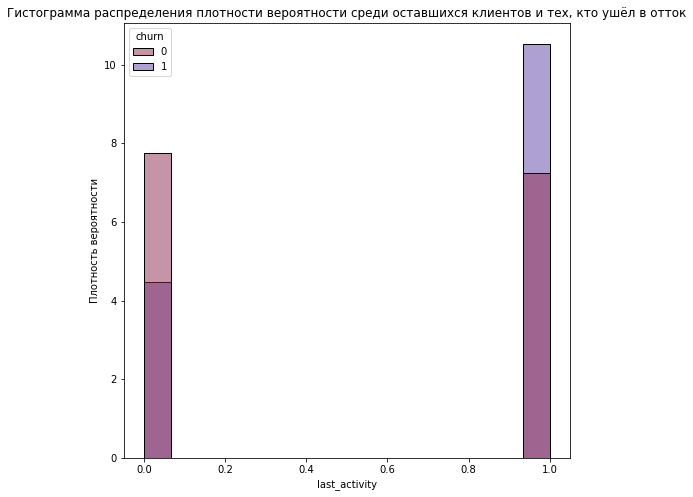

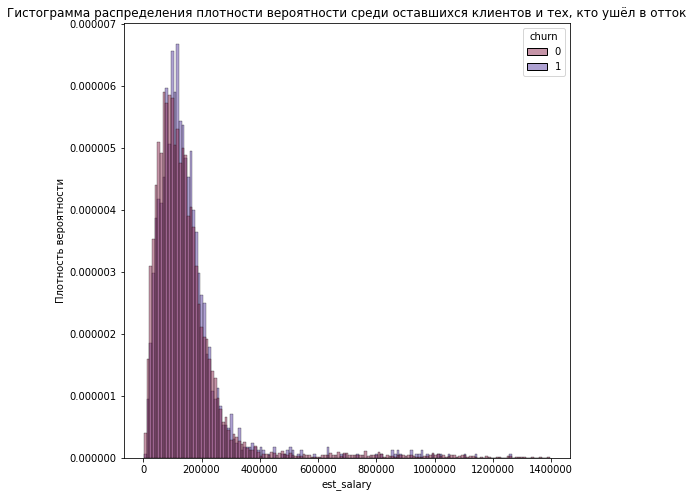

In [25]:
for col in clients.columns:
    if col in columns_num:
        plt.figure(figsize=(8,8))
        sns.histplot(data = clients, x = col, hue='churn', stat = 'density', common_norm = False, palette = 'twilight_r')
        plt.title('Гистограмма распределения плотности вероятности среди оставшихся клиентов и тех, кто ушёл в отток')
        plt.xlabel(col) 
        plt.ylabel('Плотность вероятности')
        plt.ticklabel_format(style='plain');
    elif col == 'churn' or col == 'user_id':
        pass
    else:
        plt.figure(figsize=(8,8))
        sns.histplot(data = clients, x = col, hue='churn', stat = 'density', common_norm = False, discrete=True, 
                     palette = 'twilight_r')
        plt.title('Гистограмма распределения плотности вероятности среди оставшихся клиентов и тех, кто ушёл в отток')
        plt.xlabel(col) 
        plt.ylabel('Плотность вероятности'); 

Определение "высокоотточных" интервалов:

* Количество ушедших в отток клиентов сильно повышается, если клиенту дан кредитный рейтинг в размере от 820 до 910 баллов;
* В Ярославле больше всего клиентов в целом, а также тех, кто ушёл. Для определения высокоотточных сегментов будут учитываться только клиенты в Ярославле;
* Среди клиентов чаще уходят мужчины, поэтому высокоотточные интервалы будут состоять только из них;
* Много уходящих в отток клиентов находятся в двух возрастных интервалах:
    * в возрасте от 25 до 35 лет;
    * в возрасте от 50 до 60 лет.
* Также уходит много клиентов с количество баллов собственности от 3 до 5 (включительно);
* Количество используемых продуктов у часто уходящих клиентов - 3 и более;
* Уходящие клиенты часто не имеют кредитной карты, что тоже является признаком высокоотточного сегмента;
* Уходящие клиенты чаще активны.

Два графика следует рассмотреть более детально, так как из-за наличия "выбросов" графики получились слишком мелкими, чтобы на их основании делать выводы. 

Увеличенные графики:

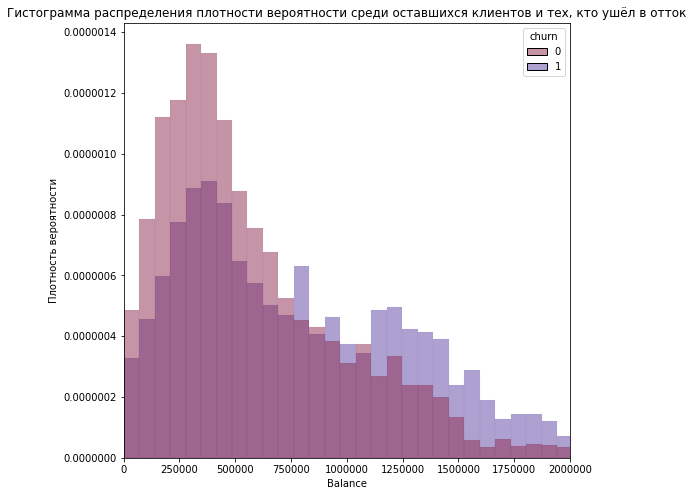

In [26]:
plt.figure(figsize=(8,8))
sns.histplot(data = clients, x = 'balance', hue='churn', stat = 'density', common_norm = False, palette = 'twilight_r')
plt.title('Гистограмма распределения плотности вероятности среди оставшихся клиентов и тех, кто ушёл в отток')
plt.xlabel('Balance') 
plt.ylabel('Плотность вероятности')
plt.ticklabel_format(style='plain')
plt.xlim([0, 2000000]);

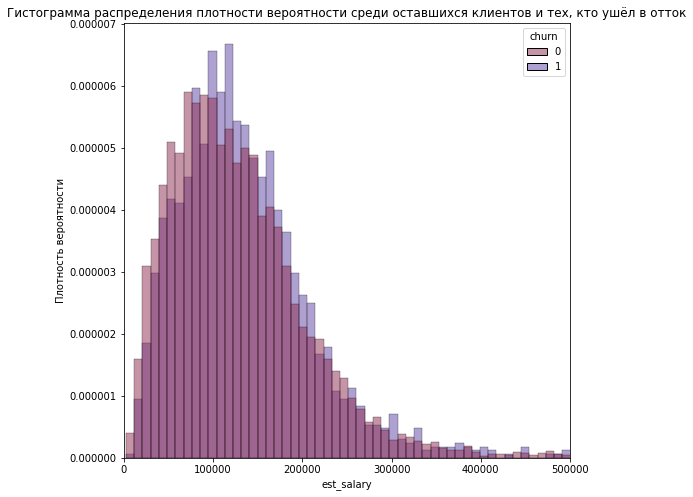

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(data = clients, x = 'est_salary', hue='churn', stat = 'density', common_norm = False, palette = 'twilight_r')
plt.title('Гистограмма распределения плотности вероятности среди оставшихся клиентов и тех, кто ушёл в отток')
plt.xlabel('est_salary') 
plt.ylabel('Плотность вероятности')
plt.ticklabel_format(style='plain')
plt.xlim([0, 500000]);

Чаще всего уходят в отток клиенты:
   * С остатком на счёте более 750 тыс. рублей;
   * C оценочным доходом в размере от 100 тыс. до 210 тыс. рублей.
   
Именно среди данных групп следует искать необходимые высокоотточные сегменты.

### Определение интервалов признаков высокоотточных сегментов

Ранее исследовательский анализ данных показал, какие признаки больше всего влияют на отток. Далее были определены высокоотточные интервалы по каждому признаку. 
Учитывая результаты, полученные ранее на каждом этапе исследования, определены интервалы признаков высокоотточных сегментов. Это:

* Количество используемых продуктов банка - 3 и более;
* Количество баллов собственности - от 3 до 5 включительно;
* Кредитный рейтинг - от 820 до 910 баллов.

Говоря о столбцах с булевыми значениями, признаки высокоотточных сегментов:
* Пол - мужчина;
* Клиент активен;

Вышеупомянутые 5 признаков не только оказывают самое большое влияние на уход из банка, но также имеют самые значимые коэффициенты. 

Куда слабее на решение уйти влияют 2 других фактора: 
* Факт наличия кредитной карты - уходящие клиенты ею не имеют;
* Возраст. Высокоотточными интервалами являются: от 25 до 35 лет и от 50 до 60 лет.

Следующие 3 признака почти никак не влияют на отток клиентов: оценочный доход клиента, город и остаток на счёте. 

У высокоотточных клиентов:
* Оценочный доход клиента - от 100 тыс. до 210 тыс. рублей;
* Город - Ярославль;
* Остаток на счёте - более 750 тыс. рублей.

Теперь, когда по каждому признаку выявлен интервал (или интервалы) высокоотточных сегментов, можно приступить к формированию высокоотточных сегментов. Несмотря на разную степень влияния признаков на отток, будут сформированы и изучены все возможные варианты сегментов по заданному количеству признаков.

### Формирование высокоотточных сегментов (1 признак)

#### Формирование высокоотточных сегментов (1 признак)

Сначала будут подготовлены датафреймы по каждому признаку:

In [28]:
clients_products = clients.query('products > 2')
clients_equity = clients.query('equity > 2 & equity < 6') 
clients_score = clients.query('score >= 820 & score <= 910')
clients_gender = clients.query('gender == 1')
clients_activity = clients.query('last_activity == 1')
clients_card = clients.query('credit_card == 0')
clients_age = clients.query('age >= 25 & age <= 35' or 'age >= 50 & age <= 60')
clients_est_salary = clients.query('est_salary > 100001 & est_salary < 210001')
clients_city = clients.query('city == "Ярославль"')
clients_balance = clients.query('balance >= 750000')

А также создан список датафреймов:

In [29]:
conditions_list = [clients_products, clients_equity, clients_score, clients_gender, clients_activity, clients_card,
                  clients_age, clients_est_salary, clients_city, clients_balance]
conditions_list

[      user_id  score       city  gender   age  equity    balance  products  \
 1      146556    861    Рыбинск       0 37.00       5  850594.33         3   
 5      202305    856    Рыбинск       1 56.00       4  863687.24         3   
 6      177259    807  Ярославль       0 39.00       3  405042.44         3   
 15     120260    731    Рыбинск       1 42.00       3 1480548.47         3   
 26     174396    898  Ярославль       0 62.00       3  364049.27         3   
 ...       ...    ...        ...     ...   ...     ...        ...       ...   
 9970   175730    816    Рыбинск       1 36.00       4  477892.07         3   
 9988   158678    889  Ярославль       1 35.00       4  880534.89         4   
 9989   215485    860  Ярославль       0 67.00       4  637403.26         3   
 9998   148700    777  Ярославль       0 68.00       3  865457.97         3   
 9999    96267    828    Рыбинск       0 58.00       3 1180886.70         4   
 
       credit_card  last_activity  est_salary  chu

И список названий датафреймов:

In [30]:
conditions_list_names = ['clients_products', 'clients_equity', 'clients_score', 'clients_gender', 'clients_activity', 
                         'clients_card', 'clients_age', 'clients_est_salary', 'clients_city', 'clients_balance']
conditions_list_names

['clients_products',
 'clients_equity',
 'clients_score',
 'clients_gender',
 'clients_activity',
 'clients_card',
 'clients_age',
 'clients_est_salary',
 'clients_city',
 'clients_balance']

Данные для создания комбинаций готовы, можно приступать к формированию сегментов.

#### Формирование высокоотточных сегментов (2 признака)

Для проверки правильности работы кода будет написана универсальная функция для двух признаков:

In [31]:
def two_conditions(condition_1, condition_2):
       new_dataframe = pd.merge(condition_1, condition_2, how='inner')
       print('Показатели для признаков', condition_1, 'и', condition_2)
       print('Средний отток в датафрейме составляет:', new_dataframe['churn'].mean())
       print('Количество уникальных клиентов в датафрейме составляет:', new_dataframe['user_id'].count())

Функция готова.
Сначала будут созданы все возможные комбинации из 11 датафреймов, количество признаков в каждой комбинации составит 2.

In [32]:
list_dataframes_pairwise = list(itertools.permutations(conditions_list, 2))
list_dataframes_pairwise

[(      user_id  score       city  gender   age  equity    balance  products  \
  1      146556    861    Рыбинск       0 37.00       5  850594.33         3   
  5      202305    856    Рыбинск       1 56.00       4  863687.24         3   
  6      177259    807  Ярославль       0 39.00       3  405042.44         3   
  15     120260    731    Рыбинск       1 42.00       3 1480548.47         3   
  26     174396    898  Ярославль       0 62.00       3  364049.27         3   
  ...       ...    ...        ...     ...   ...     ...        ...       ...   
  9970   175730    816    Рыбинск       1 36.00       4  477892.07         3   
  9988   158678    889  Ярославль       1 35.00       4  880534.89         4   
  9989   215485    860  Ярославль       0 67.00       4  637403.26         3   
  9998   148700    777  Ярославль       0 68.00       3  865457.97         3   
  9999    96267    828    Рыбинск       0 58.00       3 1180886.70         4   
  
        credit_card  last_activity  e

Аналогичная процедура будет также проведена с названиями столбцов.

In [33]:
conditions_list_names_pairwise = list(itertools.permutations(conditions_list_names, 2))
conditions_list_names_pairwise

[('clients_products', 'clients_equity'),
 ('clients_products', 'clients_score'),
 ('clients_products', 'clients_gender'),
 ('clients_products', 'clients_activity'),
 ('clients_products', 'clients_card'),
 ('clients_products', 'clients_age'),
 ('clients_products', 'clients_est_salary'),
 ('clients_products', 'clients_city'),
 ('clients_products', 'clients_balance'),
 ('clients_equity', 'clients_products'),
 ('clients_equity', 'clients_score'),
 ('clients_equity', 'clients_gender'),
 ('clients_equity', 'clients_activity'),
 ('clients_equity', 'clients_card'),
 ('clients_equity', 'clients_age'),
 ('clients_equity', 'clients_est_salary'),
 ('clients_equity', 'clients_city'),
 ('clients_equity', 'clients_balance'),
 ('clients_score', 'clients_products'),
 ('clients_score', 'clients_equity'),
 ('clients_score', 'clients_gender'),
 ('clients_score', 'clients_activity'),
 ('clients_score', 'clients_card'),
 ('clients_score', 'clients_age'),
 ('clients_score', 'clients_est_salary'),
 ('clients_

Следующий шаг - создание всех возможных сегментов клиентов по 2 признакам. 

Для удобства дальнейшего анализа необходимые данные будут так же записаны в списки.

In [34]:
number = 0
name_list = []
churn_rate_list = []
amount_of_clients = []
for i in list_dataframes_pairwise:
    new_dataframe = reduce(lambda x, y: pd.merge(x, y, how='inner'), i)
    number += 1
    name_list.append(conditions_list_names_pairwise[number-1])
    churn_rate_list.append(new_dataframe['churn'].mean())
    amount_of_clients.append(new_dataframe['user_id'].count())
    print('Датафрейм', number)
    print('Скомбинированы признаки:', conditions_list_names_pairwise[number-1])
    print('Средний отток в датафрейме составляет:', new_dataframe['churn'].mean())
    print('Количество уникальных клиентов в датафрейме составляет:', new_dataframe['user_id'].count())

Датафрейм 1
Скомбинированы признаки: ('clients_products', 'clients_equity')
Средний отток в датафрейме составляет: 0.41725352112676056
Количество уникальных клиентов в датафрейме составляет: 1136
Датафрейм 2
Скомбинированы признаки: ('clients_products', 'clients_score')
Средний отток в датафрейме составляет: 0.42071611253196933
Количество уникальных клиентов в датафрейме составляет: 782
Датафрейм 3
Скомбинированы признаки: ('clients_products', 'clients_gender')
Средний отток в датафрейме составляет: 0.5
Количество уникальных клиентов в датафрейме составляет: 752
Датафрейм 4
Скомбинированы признаки: ('clients_products', 'clients_activity')
Средний отток в датафрейме составляет: 0.47509113001215064
Количество уникальных клиентов в датафрейме составляет: 823
Датафрейм 5
Скомбинированы признаки: ('clients_products', 'clients_card')
Средний отток в датафрейме составляет: 0.3231707317073171
Количество уникальных клиентов в датафрейме составляет: 820
Датафрейм 6
Скомбинированы признаки: ('cli

Создание датафрейма с результатами для дальнейшего анализа. Всего должно получиться 90 вариантов сегментов.

In [35]:
churn_rate_list_2_ind = pd.DataFrame(
                    {'indicators': name_list,
                     'churn_rate': churn_rate_list,
                     'amount_of_clients': amount_of_clients
                                    })
churn_rate_list_2_ind_per_churn = churn_rate_list_2_ind.sort_values(by = 'churn_rate', ascending = False)
churn_rate_list_2_ind_per_churn.info()
churn_rate_list_2_ind_per_churn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 8 to 70
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         90 non-null     object 
 1   churn_rate         90 non-null     float64
 2   amount_of_clients  90 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


,indicators,churn_rate,amount_of_clients
8,"(clients_products, clients_balance)",0.53,733
81,"(clients_balance, clients_products)",0.53,733
2,"(clients_products, clients_gender)",0.50,752
27,"(clients_gender, clients_products)",0.50,752
87,"(clients_balance, clients_age)",0.49,624
...,...,...,...
34,"(clients_gender, clients_city)",0.24,2998
78,"(clients_city, clients_age)",0.23,1908
61,"(clients_age, clients_city)",0.23,1908
79,"(clients_city, clients_est_salary)",0.21,2698


Несмотря на то, что itertools перебирает комибинации в лексикографическом порядке, во избежание ошибок будет проведена проверка двух случайных сегментов из списка на правильность занесённых данных. Для этого результаты из датафрейма будет сличены с результатами, полученные при использовании функции two_conditions:

In [36]:
two_conditions(clients_products, clients_gender)

Показатели для признаков       user_id  score       city  gender   age  equity    balance  products  \
1      146556    861    Рыбинск       0 37.00       5  850594.33         3   
5      202305    856    Рыбинск       1 56.00       4  863687.24         3   
6      177259    807  Ярославль       0 39.00       3  405042.44         3   
15     120260    731    Рыбинск       1 42.00       3 1480548.47         3   
26     174396    898  Ярославль       0 62.00       3  364049.27         3   
...       ...    ...        ...     ...   ...     ...        ...       ...   
9970   175730    816    Рыбинск       1 36.00       4  477892.07         3   
9988   158678    889  Ярославль       1 35.00       4  880534.89         4   
9989   215485    860  Ярославль       0 67.00       4  637403.26         3   
9998   148700    777  Ярославль       0 68.00       3  865457.97         3   
9999    96267    828    Рыбинск       0 58.00       3 1180886.70         4   

      credit_card  last_activity  est_

Данные в датафрейме и функции совпали. Ещё одна проверка:

In [37]:
two_conditions(clients_city, clients_age) 

Показатели для признаков       user_id  score       city  gender   age  equity    balance  products  \
3      225363    866  Ярославль       0 51.00       5 1524746.26         2   
4      157978    730  Ярославль       1 34.00       5     174.00         1   
6      177259    807  Ярославль       0 39.00       3  405042.44         3   
7      218868    825  Ярославль       0 38.00       4  458145.40         2   
8      211686    923  Ярославль       1 54.00       5 1206337.87         2   
...       ...    ...        ...     ...   ...     ...        ...       ...   
9990   162357    822  Ярославль       1 31.00       3  646575.17         1   
9991   122366    840  Ярославль       0 44.00       3  326619.71         1   
9996   139170    894  Ярославль       1 46.00       0        NaN         1   
9997   115639    903  Ярославль       1 24.00       0        NaN         2   
9998   148700    777  Ярославль       0 68.00       3  865457.97         3   

      credit_card  last_activity  est_

Данные снова совпали. Датафрейм составлен правильно.

Очевидно, что данные в датафрейме "задвоены", так как были составлены все возможные комбинации из двух признаков с учётом порядка признаков в каждой комбинации, что в данном случае не имеет значения. Для удобства восприятия "повторные" сегменты будут удалены, а таблица отсортирована по убыванию по проценту оттока.

В итоговой таблице должна остаться половина значений, т.е. 45 строк.

In [38]:
churn_rate_list_2_ind= churn_rate_list_2_ind.drop_duplicates(subset=['churn_rate','amount_of_clients'],
                             keep='first')

churn_rate_list_2_ind_per_churn = churn_rate_list_2_ind.sort_values(by = 'churn_rate', ascending = False)
churn_rate_list_2_ind_per_churn.info()
churn_rate_list_2_ind_per_churn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 8 to 70
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         45 non-null     object 
 1   churn_rate         45 non-null     float64
 2   amount_of_clients  45 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


,indicators,churn_rate,amount_of_clients
8,"(clients_products, clients_balance)",0.53,733
2,"(clients_products, clients_gender)",0.50,752
62,"(clients_age, clients_balance)",0.49,624
44,"(clients_activity, clients_balance)",0.49,1415
3,"(clients_products, clients_activity)",0.48,823
6,"(clients_products, clients_est_salary)",0.46,659
35,"(clients_gender, clients_balance)",0.45,1370
5,"(clients_products, clients_age)",0.44,446
53,"(clients_card, clients_balance)",0.42,1212
1,"(clients_products, clients_score)",0.42,782


Получен датафрейм на 45 строк с отсортированными значениями. 

Последний шаг - проверить получившиеся сегменты на соответствие требованиям заказчика.

In [39]:
result1 = churn_rate_list_2_ind_per_churn.query('churn_rate >= 0.3 and amount_of_clients >= 500 and amount_of_clients < 2000')
result1.info()
result1 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 8 to 22
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         21 non-null     object 
 1   churn_rate         21 non-null     float64
 2   amount_of_clients  21 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 672.0+ bytes


,indicators,churn_rate,amount_of_clients
8,"(clients_products, clients_balance)",0.53,733
2,"(clients_products, clients_gender)",0.50,752
62,"(clients_age, clients_balance)",0.49,624
44,"(clients_activity, clients_balance)",0.49,1415
3,"(clients_products, clients_activity)",0.48,823
6,"(clients_products, clients_est_salary)",0.46,659
35,"(clients_gender, clients_balance)",0.45,1370
53,"(clients_card, clients_balance)",0.42,1212
1,"(clients_products, clients_score)",0.42,782
0,"(clients_products, clients_equity)",0.42,1136


Из 45 образованных сегментов 21 сегмент соответствуют нужным требованиям. 

ТОП-5 сегментов с самым высоким оттоком:

* Клиенты, использующие 3 и более продуктов банка, с остатком на счёте более 750 тыс. рублей - отток составляет 53%; 
* Мужчины-клиенты, использующие 3 и более продуктов банка - 50%;
* Клиенты в возрасте от 25 до 35 лет либо от 50 до 60 лет, с остатком на счёте более 750 тыс. рублей - 49%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей - тоже 49%;
* "Активные" клиенты, использующие 3 и более продуктов банка - 48%.

Несмотря на то, что основная цель исследования - найти минимум 5 сегментов с уровнем оттока 30% и выше - достигнута, исследование будет продолжено, на этот раз - с комбинациями по 3 признакам.

#### Формирование высокоотточных сегментов (3 признака)

В данной главе будет проведено аналогичное исследование сразу по трём признакам.
Создание списков:

In [40]:
list_dataframes_triple = list(itertools.permutations(conditions_list, 3))
conditions_list_names_triple = list(itertools.permutations(conditions_list_names, 3))
conditions_list_names_triple

[('clients_products', 'clients_equity', 'clients_score'),
 ('clients_products', 'clients_equity', 'clients_gender'),
 ('clients_products', 'clients_equity', 'clients_activity'),
 ('clients_products', 'clients_equity', 'clients_card'),
 ('clients_products', 'clients_equity', 'clients_age'),
 ('clients_products', 'clients_equity', 'clients_est_salary'),
 ('clients_products', 'clients_equity', 'clients_city'),
 ('clients_products', 'clients_equity', 'clients_balance'),
 ('clients_products', 'clients_score', 'clients_equity'),
 ('clients_products', 'clients_score', 'clients_gender'),
 ('clients_products', 'clients_score', 'clients_activity'),
 ('clients_products', 'clients_score', 'clients_card'),
 ('clients_products', 'clients_score', 'clients_age'),
 ('clients_products', 'clients_score', 'clients_est_salary'),
 ('clients_products', 'clients_score', 'clients_city'),
 ('clients_products', 'clients_score', 'clients_balance'),
 ('clients_products', 'clients_gender', 'clients_equity'),
 ('cli

Расчёт всех возможных комбинаций (всего их должно получиться 720, т.е. строк тоже будет 720) с последующим занесением нужных параметров в списки:

In [41]:
number = 0
name_list_3 = []
churn_rate_list_3 = []
amount_of_clients_3 = []
for i in list_dataframes_triple:
    new_dataframe_2 = reduce(lambda x, y: pd.merge(x, y, how='inner'), i)
    new_dataframe_3 = reduce(lambda new_dataframe_2, z: pd.merge(new_dataframe_2, z, how='inner'), i)
    number += 1
    name_list_3.append(conditions_list_names_triple[number-1])
    churn_rate_list_3.append(new_dataframe_3['churn'].mean())
    amount_of_clients_3.append(new_dataframe_3['user_id'].count())
    print('Датафрейм', number)
    print('Скомбинированы признаки:', conditions_list_names_triple[number-1])
    print('Средний отток в датафрейме составляет:', new_dataframe['churn'].mean())
    print('Количество уникальных клиентов в датафрейме составляет:', new_dataframe['user_id'].count())

Датафрейм 1
Скомбинированы признаки: ('clients_products', 'clients_equity', 'clients_score')
Средний отток в датафрейме составляет: 0.3848987108655617
Количество уникальных клиентов в датафрейме составляет: 1629
Датафрейм 2
Скомбинированы признаки: ('clients_products', 'clients_equity', 'clients_gender')
Средний отток в датафрейме составляет: 0.3848987108655617
Количество уникальных клиентов в датафрейме составляет: 1629
Датафрейм 3
Скомбинированы признаки: ('clients_products', 'clients_equity', 'clients_activity')
Средний отток в датафрейме составляет: 0.3848987108655617
Количество уникальных клиентов в датафрейме составляет: 1629
Датафрейм 4
Скомбинированы признаки: ('clients_products', 'clients_equity', 'clients_card')
Средний отток в датафрейме составляет: 0.3848987108655617
Количество уникальных клиентов в датафрейме составляет: 1629
Датафрейм 5
Скомбинированы признаки: ('clients_products', 'clients_equity', 'clients_age')
Средний отток в датафрейме составляет: 0.3848987108655617


Создание датафрейма с результатами:

In [42]:
churn_rate_list_3_ind_per_churn = pd.DataFrame(
                    {'indicators': name_list_3,
                     'churn_rate': churn_rate_list_3,
                     'amount_of_clients': amount_of_clients_3 
                    }
                     ).sort_values(by = 'churn_rate', ascending = False).round({
                    'churn_rate': 2, 'amount_of_clients': 0})
churn_rate_list_3_ind_per_churn.head(10)

,indicators,churn_rate,amount_of_clients
700,"(clients_balance, clients_age, clients_activity)",0.68,354
685,"(clients_balance, clients_activity, clients_age)",0.68,354
471,"(clients_age, clients_activity, clients_balance)",0.68,354
335,"(clients_activity, clients_age, clients_balance)",0.68,354
500,"(clients_age, clients_balance, clients_activity)",0.68,354
357,"(clients_activity, clients_balance, clients_age)",0.68,354
696,"(clients_balance, clients_age, clients_products)",0.66,159
69,"(clients_products, clients_balance, clients_age)",0.66,159
496,"(clients_age, clients_balance, clients_products)",0.66,159
439,"(clients_age, clients_products, clients_balance)",0.66,159


Удаление дубликатов (в итоговой таблице должно получиться 120 "уникальных" строк), сортировка по проценту оттока внутри сегмента:

In [43]:
churn_rate_list_3_ind_per_churn_no_dub = churn_rate_list_3_ind_per_churn.drop_duplicates(subset=['churn_rate','amount_of_clients'],
                             keep='first').sort_values(by = 'churn_rate', ascending = False).round(
                            {'churn_rate': 2, 'amount_of_clients': 0})
churn_rate_list_3_ind_per_churn_no_dub.info()
churn_rate_list_3_ind_per_churn_no_dub

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 700 to 563
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         119 non-null    object 
 1   churn_rate         119 non-null    float64
 2   amount_of_clients  119 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


,indicators,churn_rate,amount_of_clients
700,"(clients_balance, clients_age, clients_activity)",0.68,354
66,"(clients_products, clients_balance, clients_gender)",0.66,364
696,"(clients_balance, clients_age, clients_products)",0.66,159
31,"(clients_products, clients_activity, clients_balance)",0.63,385
429,"(clients_card, clients_balance, clients_age)",0.60,268
...,...,...,...
269,"(clients_gender, clients_est_salary, clients_age)",0.30,728
486,"(clients_age, clients_est_salary, clients_city)",0.28,801
526,"(clients_est_salary, clients_score, clients_city)",0.28,1344
605,"(clients_city, clients_gender, clients_age)",0.26,1128


Попытка удаления дубликатов выявила новую проблему - удаление одного нужного сегмента из-за полного совпадения коэффициента оттока и количества клиентов с другим сегментов. 

Поиск данных сегментов (их должно оказаться 12, из которых 6 будут комбинациями одной тройки признаков, а 6 других - второй):

In [44]:
churn_rate_list_3_ind_per_churn_2 = churn_rate_list_3_ind_per_churn.groupby(
    ['churn_rate', 'amount_of_clients']).count().sort_values(by = 'indicators', ascending = False).reset_index()
churn_rate_list_3_ind_per_churn_2

,churn_rate,amount_of_clients,indicators
0,0.47,324,12
1,0.25,1393,6
2,0.47,240,6
3,0.49,764,6
4,0.49,619,6
...,...,...,...
114,0.39,1201,6
115,0.39,922,6
116,0.38,1424,6
117,0.38,1210,6


Интересующие сегменты имеют отток в размере 47% и состоят из 324 клиента каждый.
Уже сейчас можно сказать, что данные сегменты не попадут в итоговую выборку подходящих для заказчика сегментов, т.к. для этого у них слишком маленькое количество клиентов (324 при минимуме в 500 человек), однако для полноты картины они будут изучены подробнее.

In [45]:
duplicates_indicators = churn_rate_list_3_ind_per_churn.query('churn_rate == 0.47 and amount_of_clients == 324')
duplicates_indicators['indicators'].unique()

array([('clients_products', 'clients_age', 'clients_city'),
       ('clients_age', 'clients_city', 'clients_products'),
       ('clients_age', 'clients_products', 'clients_city'),
       ('clients_equity', 'clients_age', 'clients_products'),
       ('clients_products', 'clients_age', 'clients_equity'),
       ('clients_equity', 'clients_products', 'clients_age'),
       ('clients_city', 'clients_age', 'clients_products'),
       ('clients_products', 'clients_equity', 'clients_age'),
       ('clients_age', 'clients_products', 'clients_equity'),
       ('clients_products', 'clients_city', 'clients_age'),
       ('clients_age', 'clients_equity', 'clients_products'),
       ('clients_city', 'clients_products', 'clients_age')], dtype=object)

Здесь две комбинации по 3 признакам (порядок признаков в сегменте не имеет значения):
* clients_products, clients_age, clients_city
* clients_products, clients_equity, clients_age.

In [46]:
churn_rate_list_3_ind_per_churn_no_dub.query('churn_rate == 0.47 and amount_of_clients == 324')

,indicators,churn_rate,amount_of_clients
46,"(clients_products, clients_age, clients_city)",0.47,324


In [47]:
last_segment = duplicates_indicators.iloc[3] 
last_segment 

indicators           (clients_equity, clients_age, clients_products)
churn_rate                                                      0.47
amount_of_clients                                                324
Name: 112, dtype: object

В выборку из уникальных сегментов попал:
*  	(clients_products, clients_age, clients_city) 	 	

Соответственно, в таблицу необходимо добавить второй отсутствующий сегмент

In [48]:
churn_rate_list_3_ind_per_churn_no_dub = churn_rate_list_3_ind_per_churn_no_dub.append(last_segment, 
                                  ignore_index=True).sort_values(by = ['churn_rate', 'amount_of_clients'], ascending = False)
churn_rate_list_3_ind_per_churn_no_dub.info()
churn_rate_list_3_ind_per_churn_no_dub.query('churn_rate == 0.47 and amount_of_clients == 324')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 118
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         120 non-null    object 
 1   churn_rate         120 non-null    float64
 2   amount_of_clients  120 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ KB


,indicators,churn_rate,amount_of_clients
41,"(clients_products, clients_age, clients_city)",0.47,324
119,"(clients_equity, clients_age, clients_products)",0.47,324


In [49]:
churn_rate_list_3_ind_per_churn_no_dub.head(50)

,indicators,churn_rate,amount_of_clients
0,"(clients_balance, clients_age, clients_activity)",0.68,354
1,"(clients_products, clients_balance, clients_gender)",0.66,364
2,"(clients_balance, clients_age, clients_products)",0.66,159
3,"(clients_products, clients_activity, clients_balance)",0.63,385
5,"(clients_gender, clients_activity, clients_balance)",0.60,706
4,"(clients_card, clients_balance, clients_age)",0.60,268
8,"(clients_products, clients_balance, clients_est_salary)",0.59,357
7,"(clients_products, clients_est_salary, clients_activity)",0.59,338
6,"(clients_age, clients_est_salary, clients_products)",0.59,164
9,"(clients_activity, clients_balance, clients_score)",0.57,778


Недостающий элемент успешно добавлен в таблицу уникальных сегментов.
Последний шаг - отсортировать только те результаты, которые соответствуют заданным критериям:

In [50]:
result2 = churn_rate_list_3_ind_per_churn_no_dub.query(
         'churn_rate >= 0.30 and amount_of_clients >= 500 and amount_of_clients < 2000')
result2.info()
result2.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 114
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indicators         80 non-null     object 
 1   churn_rate         80 non-null     float64
 2   amount_of_clients  80 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,indicators,churn_rate,amount_of_clients
5,"(clients_gender, clients_activity, clients_balance)",0.60,706
9,"(clients_activity, clients_balance, clients_score)",0.57,778
12,"(clients_balance, clients_est_salary, clients_activity)",0.57,708
11,"(clients_balance, clients_activity, clients_card)",0.57,666
15,"(clients_gender, clients_card, clients_balance)",0.56,570
19,"(clients_activity, clients_city, clients_balance)",0.55,815
16,"(clients_balance, clients_products, clients_city)",0.55,534
23,"(clients_products, clients_balance, clients_equity)",0.53,629
21,"(clients_gender, clients_products, clients_equity)",0.53,555
25,"(clients_city, clients_gender, clients_products)",0.51,516


Всего получилось 80 сегментов, подходящих по условиям. Вместе с результатами, полученными в прошлый раз, это 101 сегмент. 

ТОП-7 сегментов с самым высоким оттоком (выше, чем у сегментов из ТОП-5, состоящих из двух признаков): 
* "Активные" клиенты - мужчины, с остатком на счёте более 750 тыс. рублей - 60%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и кредитным рейтингом от от 820 до 910 баллов - 57%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и оценочным доходом - от 100 тыс. до 210 тыс. рублей - 57%;
* "Активные" клиенты, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 57%;
* Клиенты - мужчины, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 56%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей из Ярославля - 55%; 
* Клиенты из Ярославля, с остатком на счёте более 750 тыс. рублей, использующие 3 и более продуктов банка - 55%.

Главная цель исследования достигнута, можно переходить к интерпретации результатов.

### Высокоотточные сегменты. Итоги и рекомендации

Целью данного исследования было найти как минимум 5 сегментов, соответствующих запросам заказчика. В результате были обнаружены:

* 21 сегмент, состоящий из 2 признаков;
* 80 сегментов, состоящих из 3 признаков.


ТОП-7 сегментов с самым высоким оттоком, состоящим из 3 признаков:

* "Активные" клиенты - мужчины, с остатком на счёте более 750 тыс. рублей - 60%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и кредитным рейтингом от от 820 до 910 баллов - 57%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и оценочным доходом - от 100 тыс. до 210 тыс. рублей - 57%;
* "Активные" клиенты, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 57%;
* Клиенты - мужчины, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 56%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей из Ярославля - 55%; 
* Клиенты из Ярославля, с остатком на счёте более 750 тыс. рублей, использующие 3 и более продуктов банка - 55%.

ТОП-5 сегментов с самым высоким оттоком, состоящим из 2 признаков:

* Клиенты, использующие 3 и более продуктов банка, с остатком на счёте более 750 тыс. рублей - отток составляет 53%; 
* Мужчины-клиенты, использующие 3 и более продуктов банка - 50%;
* Клиенты в возрасте от 25 до 35 лет либо от 50 до 60 лет, с остатком на счёте более 750 тыс. рублей - 49%;
* "Активные" клиенты, с остатком на счёте более 750 тыс. рублей - тоже 49%;
* "Активные" клиенты, использующие 3 и более продуктов банка - 48%.

Как можно наблюдать выше, многие признаки в самых высокоотточных сегментах повторяются. Так, очень часто встречаются:
* "Активные" клиенты;
* С остатком на счёте более 750 тыс. рублей;
* Использующие 3 и более продуктов банка;
* Клиенты - мужчины;
* не имеющие кредитной карты банка.

Другие признаки, попавшие в ТОП:
* с кредитным рейтингом от от 820 до 910 баллов;
* с оценочным доходом - от 100 тыс. до 210 тыс. рублей;
* из Ярославля;
* в возрасте от 25 до 35 лет либо от 50 до 60 лет.

**Рекомендации:**

В целях уменьшения оттока пользователей рекомендуется сосредоточить основные усилия на вышеуказанных признаках. В частности, предлагается:

* Придумать и реализовать эффективную стратегию "удержания" клиентов, так как высокоотточными в первую очередь являются "активные" клиенты.
* Придумать рекламные компании, рассчитанные на мужчин;
* Разработать линейку интересных предложений, связанных с кредитными картами банка, уделив особое внимание клиентам с остатком на счёте более 750 тыс. рублей;
* Разработать специальные акции для клиентов, использующие более 3 продуктов банка.


Во вторую очередь рекомендуется увеличить количество рекламных кампаний и предложений для клиентов:

* с кредитным рейтингом от от 820 до 910 баллов;
* с оценочным доходом - от 100 тыс. до 210 тыс. рублей;
* в Ярославле;
* в возрасте от 25 до 35 лет либо от 50 до 60 лет.

Привлечение и удержание клиентов с данными признаками должно существенно помочь решить проблему оттока клиентов банка.

В завершение исследования также будут проверены 2 гипотезы.

## Проверка гипотез

Будут проверены 2 гипотезы. Для их проверки будет использоваться специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind().

Должны выполняться следующие условия:

* Генеральные совокупности не зависят друг от друга;
* Выборочные средние нормально распределены;
* Дисперсии рассматриваемых генеральных совокупностей равны. 

### Гипотеза 1

Первая гипотеза - о различии дохода между теми клиентами, которые ушли, и теми, которые остались.

Первый шаг - проверка на соответствие условями:

* "Генеральные совокупности не зависят друг от друга" - это условие выполнено;
* "Выборочные средние нормально распределены" - датасеты достаточно велики, чтобы считать это условие выполненным (8153 оставшихся клиентов и 1819 ушедших);
* "Дисперсии рассматриваемых генеральных совокупностей равны" - выборки не равны по размеру, и нет информации о дисперсиях рассматриваемых генеральных совокупностей, поэтому параметр equal_var будет указан как False.

В колонке est_salary нет пропущенных значений, удаление пропусков не требуется.

Будут выдвинуты две гипотезы:
* H0: средний доход среди тех клиентов, которые ушли, и тех, которые остались, одинаковый;
* H1: средний доход среди тех клиентов, которые ушли, и тех, которые остались, не одинаковый.

И выбран уровень статистической значимости (alpha):

In [51]:
alpha = 0.01 

clients_stayed_est_salary = clients_stayed['est_salary']
clients_left_est_salary = clients_left['est_salary']

res = st.ttest_ind(clients_stayed_est_salary, clients_left_est_salary, equal_var = False)

print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8536869893829319
Не получилось отвергнуть нулевую гипотезу


**Вывод:** не получилось отвергнуть нулевую гипотезу. Средний доход среди тех клиентов, которые ушли, и тех, которые остались, одинаковый.

### Гипотеза 2

Вторая гипотеза - о различии в возрасте между теми клиентами, которые ушли, и теми, которые остались.

Как и в прошлый раз, три обязательных условия выполнены (используются данные из того же датафрейма). Пропусков нет.

In [52]:
clients_stayed_age = clients_stayed['age']
clients_left_age = clients_left['age']

Выдвижение гипотез:
* H0: средний возраст среди тех клиентов, которые ушли, и тех, которые остались, одинаковый;
* H1: средний возраст среди тех клиентов, которые ушли, и тех, которые остались, не одинаковый.

Уровень статистической значимости (alpha) останется тем же:

In [53]:
alpha = 0.01 

res_2 = st.ttest_ind(clients_stayed_age, clients_left_age, equal_var = False)

print('p-значение:', res_2.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.116299688352344e-07
Не получилось отвергнуть нулевую гипотезу


**Вывод:** не получилось отвергнуть нулевую гипотезу. Средний возраст среди тех клиентов, которые ушли, и тех, которые остались, одинаковый.

Полученные результаты также указывают на то, что решение искать высокоотточные сегменты не по признакам, а по отдельным интервалам внутри данных признаков, было правильным.

## Заключение

Данное исследование было посвящено анализу оттока клиентов банка "Метанпром" и заказано его отделом маркетинга.

Главная цель - обнаружить высокоотточные сегменты, включающие в себя от 500 до 2000 пользователей, целевой показатель оттока внутри сегмента должен был составлять 30% и выше. 

Был проведён исследовательский анализ данных, в рамках которого выяснилось следующее: 

* В среднем отток по датасету составляет 18%;
* Больше всего влияние на решение уйти оказывают количество продуктов банка, которым пользуется клиент, количество баллов собственности, активность клиента, кредитный рейтинг, пол и факт наличия кредитной карты. У этих же признаков самые значимые коэффициенты;
* Слабо или почти никак не влияют на отток оценочный доход, город и остаток на счёте. Эти же коэффициенты наименее значимые.
* При сравнении оставшихся и ушедших клиентов были выявлены следующие заметные различия:
    * Мужчины чаще уходят в отток;
    * У уходящих в отток кредитный рейтинг заметно выше, чем у остающихся;
    * Количество баллов собственности у уходящих составляет 3,8, что гораздо больше, чем 2,4 у оставшихся клиентов;
    * Ушедшие клиенты реже владели кредитной картой банка;
    * Уходящие клиенты более "активные";
* Были сформулированы следующие интервалы признаков высокоотточных сегментов:
    * Количество используемых продуктов банка - 3 и более;
    * Количество баллов собственности - от 3 до 5 включительно;
    * Кредитный рейтинг - от 820 до 910 баллов.
    * Пол - мужчина;
    * Клиент активен; 
    * Факт наличия кредитной карты - уходящие клиенты ею не имеют;
    * Возраст. Высокоотточными интервалами являются: от 25 до 35 лет и от 50 до 60 лет.
    * Оценочный доход клиента - от 100 тыс. до 210 тыс. рублей;
    * Город - Ярославль;
    * Остаток на счёте - более 750 тыс. рублей.

* В результате формирования высокоотточных сегментов было выявлено 21 сегмент целевых сегмента с 2 признаками и 80 целевых сегментов с 3 признаками.
* ТОП-5 сегментов с 3 признаками::
    * Клиенты, использующие 3 и более продуктов банка, с остатком на счёте более 750 тыс. рублей - отток составляет 53%; 
    * Мужчины-клиенты, использующие 3 и более продуктов банка - 50%;
    * Клиенты в возрасте от 25 до 35 лет либо от 50 до 60 лет, с остатком на счёте более 750 тыс. рублей - 49%;
    * "Активные" клиенты, с остатком на счёте более 750 тыс. рублей - тоже 49%;
    * "Активные" клиенты, использующие 3 и более продуктов банка - 48%.
* ТОП-7 сегментов с 2 признаками:
    * "Активные" клиенты - мужчины, с остатком на счёте более 750 тыс. рублей - 60%;
    * "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и кредитным рейтингом от от 820 до 910 баллов - 57%;
    * "Активные" клиенты, с остатком на счёте более 750 тыс. рублей и оценочным доходом - от 100 тыс. до 210 тыс. рублей - 57%;
    * "Активные" клиенты, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 57%;
    * Клиенты - мужчины, не имеющие кредитной карты банка, с остатком на счёте более 750 тыс. рублей - 56%;
    * "Активные" клиенты, с остатком на счёте более 750 тыс. рублей из Ярославля - 55%; 
    * Клиенты из Ярославля, с остатком на счёте более 750 тыс. рублей, использующие 3 и более продуктов банка - 55%.
* Рекомендации для отдела маркетинга:
    * Придумать и реализовать эффективную стратегию "удержания" клиентов, так как высокоотточными в первую очередь являются "активные" клиенты.
    * Придумать рекламные компании, рассчитанные на мужчин;
    * Разработать линейку интересных предложений, связанных с кредитными картами банка, уделив особое внимание клиентам с остатком на счёте более 750 тыс. рублей;
    * Разработать специальные акции для клиентов, использующие более 3 продуктов банка.
* Во вторую очередь рекомендуется увеличить количество рекламных кампаний и предложений для клиентов:
    * с кредитным рейтингом от от 820 до 910 баллов;
    * с оценочным доходом - от 100 тыс. до 210 тыс. рублей;
    * в Ярославле;
    * в возрасте от 25 до 35 лет либо от 50 до 60 лет.
* Также в рамках исследования были проверены две гипотезы со следующими результатами:
    * Средний доход среди тех клиентов, которые ушли, и тех, которые остались, одинаковый.
    * Средний возраст среди тех клиентов, которые ушли, и тех, которые остались, одинаковый.